<a href="https://colab.research.google.com/github/nrjanjanam/dog_cat_recog_sigmoid/blob/main/Dog_Cat_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for getting files from gdrive
!pip install Pydrive

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py #dataset reading file
from PIL import Image #Python Imaging Library
import matplotlib.image as mpimg
import os #for testing

#for getting dataset from gdrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
import shutil #for extracting tar file

%matplotlib inline

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1-OauXAhZvAHScztLEVmjQyE--N9xrAIn"})   
downloaded.GetContentFile('deeplearningai_datasets_cat_vs_noncat.tar')

In [ ]:
shutil.unpack_archive(filename="deeplearningai_datasets_cat_vs_noncat.tar", extract_dir="/content/drive/My Drive/Datasets",format="tar")

train_dataset = h5py.File("train_catvnoncat.h5","r") #reading the training set
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set labels

test_dataset = h5py.File("test_catvnoncat.h5","r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #test set labels

classes = np.array(test_dataset["list_classes"][:])

train_set_y = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

Size of training set is: 209
Size of test set is: 50
Height/Width of each image: 64
Each image is of size:( 64 , 64 , 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
y =  1 , it is a cat picture


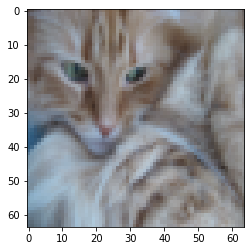

In [ ]:
#let's see a picture in our dataset
#first let's check size of training set
m_train = train_set_x_orig.shape[0]
m_test =  test_set_y_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print("Size of training set is:", m_train) #you can also check train_set_y for the length
print("Size of test set is:", m_test)
print("Height/Width of each image:", num_px)
print("Each image is of size:(",num_px,",",num_px,", 3)")
print("train_set_x shape:", train_set_x_orig.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_x shape:", test_set_x_orig.shape)
print("test_set_y shape:", test_set_y.shape)


index = 2

plt.imshow(train_set_x_orig[index])
print("y = ", train_set_y[0,index], ", it is a " + classes[np.squeeze(train_set_y[0,index])].decode("utf-8"), "picture") #decoding is done to convert byte type to string type

In [ ]:
#flattening train and test set to 1D arrays
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T #-1 is substitued by numpy itself
print("Shape of flattened train x:", train_set_x_flatten.shape)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print("Shape of flattened test x:", test_set_x_flatten.shape)

Shape of flattened train x: (12288, 209)
Shape of flattened test x: (12288, 50)


In [ ]:
#standardizing the dataset
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [ ]:
#defination of helper functions
#sigmoid function
def sigmoid(z):
  s = 1/(1+np.exp(-z))
  return s
print("Sigmoid check: ",sigmoid(np.array([0,2]))) 
print("-"*40)

#initialization of parameters
def initialize_with_zeros(dim):
  w= np.zeros((dim,1))
  b= 0

  assert w.shape == (dim,1)
  assert isinstance(b,float) or isinstance(b,int)

  return w,b
dim = 2
w,b = initialize_with_zeros(dim)
print("Initialization check:")
print("w = ", w)
print("b = ",b)
print("-"*40)

#propagation
def propagate(w, b, X, Y):
  m = X.shape[1]
  #forward prop
  A = sigmoid(np.dot(w.T,X)+b)
  cost = -1*np.sum(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))/m

  #backward prop
  dw = np.dot(X,(A-Y).T)/m
  db = np.sum(A-Y)/m

  assert dw.shape == w.shape
  assert db.dtype == float
  cost = np.squeeze(cost)
  assert cost.shape == ()

  grads = {"dw": dw,
           "db": db}
  return grads, cost
print("Prop Checking:")
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print("-"*40)

#optimization
def optimize( w,b,X,Y,num_iter,learning_rate, print_cost=False ):
  costs = []
  for i in range(num_iter):
    #cost and grad descent
    grads, cost = propagate(w, b, X, Y)
    dw = grads["dw"]
    db = grads["db"]
    
    #updating dw and db 
    w = w - learning_rate*dw
    b = b - learning_rate*db

    #for recoding costs
    if i%100 ==0:
      costs.append(cost)

    #prnt cost every 100 iterations
    if print_cost and i % 100 ==0:
      print("Cost after iteration %i is %f" %(i,cost))
    
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
  return params, grads, costs
print("Optimization checking:")
params, grads, costs = optimize(w, b, X, Y, num_iter= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("-"*40)

#predict function
def predict(w,b,X):
  Y_pred = np.zeros((1,X.shape[1]))
  w=w.reshape(X.shape[0],1)

  A = sigmoid(np.dot(w.T,X)+b)

  for i in range(A.shape[1]):
    Y_pred = np.where(A<0.5,0,1)
    pass
  
  assert Y_pred.shape == (1, X.shape[1])

  return Y_pred
print("Prediction Checking:")
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))
print("-"*40)


Sigmoid check:  [0.5        0.88079708]
----------------------------------------
Initialization check:
w =  [[0.]
 [0.]]
b =  0
----------------------------------------
Prop Checking:
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
----------------------------------------
Optimization checking:
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657
----------------------------------------
Prediction Checking:
predictions = [[1 1 0]]
----------------------------------------


In [ ]:
#final model
def model(X_train, Y_train, X_test, Y_test, num_iter = 2000, learning_rate = 0.5, print_cost = False):
  w,b = initialize_with_zeros(X_train.shape[0])
  params, grads, costs = optimize(w, b, X_train, Y_train, num_iter, learning_rate, print_cost)
  w = params["w"]
  b = params["b"]

  Y_pred_test = predict(w, b, X_test)
  Y_pred_train = predict(w, b, X_train)

  print("Train accuracy: {} %".format(100-np.mean(np.abs(Y_pred_train - Y_train))*100))
  print("Test accuracy: {}%".format(100-np.mean(np.abs(Y_pred_test-Y_test))*100))

  d = {"costs": costs,
       "Y_pred_test": Y_pred_test,
       "Y_pred_train": Y_pred_train,
       "w":w,
       "b":b,
       "learning_rate": learning_rate,
       "num_iter": num_iter}
  return d 

In [ ]:
d= model(train_set_x,train_set_y, test_set_x, test_set_y,num_iter=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0 is 0.693147
Cost after iteration 100 is 0.584508
Cost after iteration 200 is 0.466949
Cost after iteration 300 is 0.376007
Cost after iteration 400 is 0.331463
Cost after iteration 500 is 0.303273
Cost after iteration 600 is 0.279880
Cost after iteration 700 is 0.260042
Cost after iteration 800 is 0.242941
Cost after iteration 900 is 0.228004
Cost after iteration 1000 is 0.214820
Cost after iteration 1100 is 0.203078
Cost after iteration 1200 is 0.192544
Cost after iteration 1300 is 0.183033
Cost after iteration 1400 is 0.174399
Cost after iteration 1500 is 0.166521
Cost after iteration 1600 is 0.159305
Cost after iteration 1700 is 0.152667
Cost after iteration 1800 is 0.146542
Cost after iteration 1900 is 0.140872
Train accuracy: 99.04306220095694 %
Test accuracy: 70.0%


y =  1  , you predicted it is a  non-cat  picture.


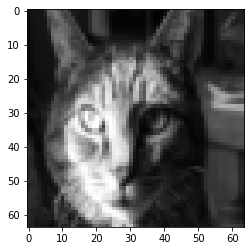

In [ ]:
#incorrect prediction example
index = 30
plt.imshow(test_set_x[:,index].reshape((num_px,num_px,3)))
print("y = ", test_set_y[0,index], " , you predicted it is a " , classes[d["Y_pred_test"][0,index]].decode("utf-8"), " picture.")
#print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_pred_test"][0,index]].decode("utf-8") +  "\" picture.")

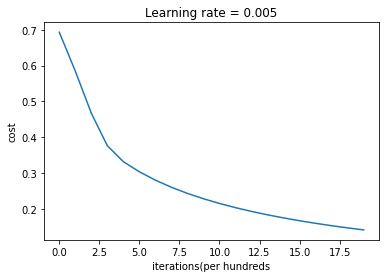

In [ ]:
#plotting learning curves(with costs)
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iterations(per hundreds")
plt.title("Learning rate = "+ str(d["learning_rate"]))
plt.show()


learning rate is : 0.05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


Train accuracy: 100.0 %
Test accuracy: 68.0%

 --------------------------------------------------
learning rate is : 0.001
Train accuracy: 88.99521531100478 %
Test accuracy: 64.0%

 --------------------------------------------------
learning rate is : 0.0001
Train accuracy: 68.42105263157895 %
Test accuracy: 36.0%

 --------------------------------------------------


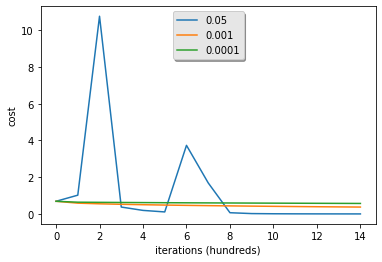

In [ ]:
#try with different learning rates
learning_rates = [0.05, 0.001, 0.0001]
models = {}
for i in learning_rates:
  print("learning rate is :" , i)
  models[i] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iter = 1500, learning_rate = i, print_cost = False)
  print('\n', "-"*50)
for i in learning_rates:
  plt.plot(np.squeeze(models[i]["costs"]), label= str(models[i]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


eye.jpg
catcartoon.jpg
cat_eye.jpg
notcat.jpg
mopcat.jpg
sidecat.jpg
rachelcat.jpg
maskcat.jpg
y = 0, your algorithm predicts a "non-cat" picture.
y = 1, your algorithm predicts a "cat" picture.
y = 1, your algorithm predicts a "cat" picture.
y = 0, your algorithm predicts a "non-cat" picture.
y = 1, your algorithm predicts a "cat" picture.
y = 0, your algorithm predicts a "non-cat" picture.
y = 1, your algorithm predicts a "cat" picture.
y = 1, your algorithm predicts a "cat" picture.


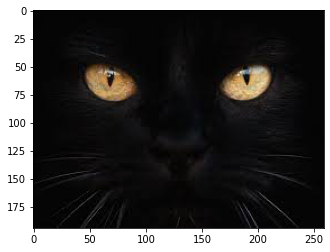

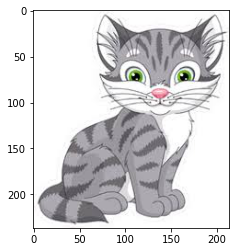

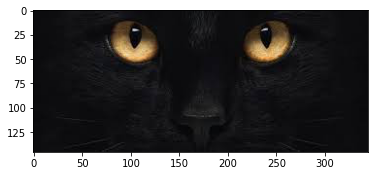

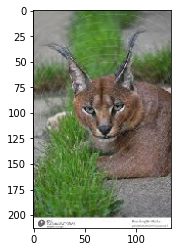

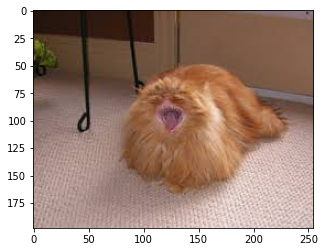

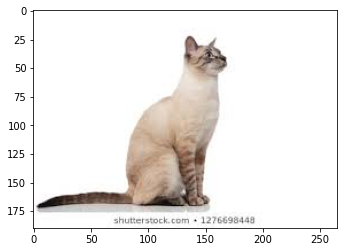

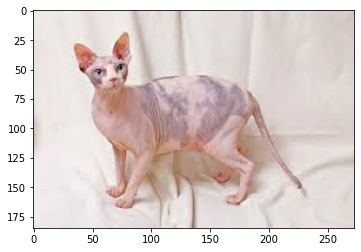

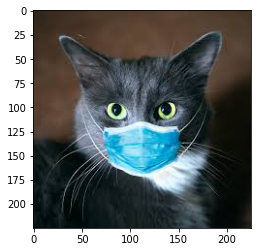

In [ ]:
def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)
images= []
for filename in os.listdir("/content/drive/My Drive/Datasets/CatTest/"):
  if filename.endswith("jpg"): 
        print(filename)
        images.append(filename)
for im in images:
    # We preprocess the image to fit your algorithm.
    image = np.asarray(Image.open(im).resize((num_px,num_px))).reshape((1,num_px*num_px*3)).T
    image = image/255
    my_predicted_image = predict(d["w"], d["b"], image)

    process(im)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


In [ ]:
#conclusion cannot detect side pose, and black eyes confused